In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

In [2]:
# def new_func():
#     df = pd.read_csv('data/Health.csv', low_memory=False).rename({
#     'hhidpn': 'id',
#     'rmstat': 'состоит в браке',
#     'ragender': 'пол',
#     'collegeplus': 'закончил колледж',
#     'rahispan': 'латиноамериканец',
#     'raracem': 'раса',
#     'riwbegy': 'date',
#     'ragey_b': 'возраст',
#     'sagey_b': 'возраст супруга/супруги',
#     'retired': 'на пенсии',
#     'rlbrf': 'сколько работает', # статус на рынке труда
#     'index_wave': 'волна опроса',
#     'cpi': 'индекс потребительских цен',
#     'rhltc': 'изменение здоровья',
#     'rhlthlm': 'проблемы со здоровьем ограничивают возможность работать',
#     'rhibpe': 'высокое давление',
#     'rdiabe': 'диабет',
#     'rcancre': 'рак',
#     'rlunge': 'болезнь легких',
#     'rhearte': 'заболевание сердца',
#     'rstroke': 'инсульт',
#     'rpsyche': 'психические заболевания',
#     'rarthre': 'артрит',
#     'rhosp': 'попадал в больницу за последний год',
#     'rhspnit': 'кол-во ночей, которое провел в больнице',
#     'oop_spend': 'медицинские расходы, не покрываемые страховкой',
#     'riearn': 'доход от зп',
#     'siearn': 'доход супруга от зп',
#     'ripena': 'доход от пенсии',
#     'sipena': 'доход супруга от пенсии',
#     'rgov': 'доход от др выплат',
#     'sgov': 'доход супруга от др выплат',
#     'rcovr': 'мед страховка оплачивается работадателем респондента',
#     'rcovs': 'мед страховка оплачивается работадателем супруга',
#     'insured_gov': 'гос мед страховка',
#     'uninsured': 'отсутствие мед страховки',
#     'rjphys': 'работа требует физ усилий',
#     'rjlift': 'работа требует поднятие тяжестей',
#     'rjweeks': 'сколько недель работал на осн работе за последний год',
#     'rjweek2': 'сколько недель работал на 2 работе за последний год',
#     'rjcten': 'сколько проработал на нынещнем рабочем месте'
# }, axis=1).replace({'.m': np.nan, '.p': np.nan, '.k': np.nan,
#                     '.a': np.nan, '.u': np.nan, '.d': np.nan,
#                     '.w': np.nan, '.s': np.nan, '.n': np.nan,
#                     '.x': np.nan, '.v': np.nan, '.r': np.nan,
#                     '.y': np.nan, '.c': np.nan, '.e': np.nan,
#                     '.t': np.nan, '.z': np.nan})
#     df['сколько работает'] = df['сколько работает'].replace({1: 'полный рабочий день', 2: 'частичный рабочий день', 3:'безработный',
#                                                         4:'частично на пенсии', 5: 'на пенсии', 6:'инвалид', 7:'не работает'})
#     df['состоит в браке'] = df['состоит в браке'].fillna(-1).astype('int').replace({1: 'да', 2: 'да, супруг отсутствует', 3: 'совместное проживание',
#                                                        4: 'разошлись, но в оф браке', 5: 'разошлись', 6: 'не понятно',
#                                                        7: 'вдова', 8: 'никогда не состоял в браке', -1: np.nan})

#     df.to_csv('data/new_df.csv', index=False)

# new_func()

In [2]:
def get_dataframe():
    df = pd.read_csv('/Users/nikitaromanov/Downloads/new_df.csv')
    df['на пенсии'] /= 100
    
    df['доход от зп'] = df['доход от зп'] / df['индекс потребительских цен']
    df['доход от др выплат'] = df['доход от др выплат'] / df['индекс потребительских цен']
    df['доход от пенсии'] = df['доход от пенсии'] / df['индекс потребительских цен']
    df['доход нормализованный'] = df['доход от зп'] + df['доход от др выплат'] + df['доход от пенсии']
    
    df['доход супруга от зп'] = df['доход супруга от зп'] / df['индекс потребительских цен']
    df['доход супруга от др выплат'] = df['доход супруга от др выплат'] / df['индекс потребительских цен']
    df['доход супруга от пенсии'] = df['доход супруга от пенсии'] / df['индекс потребительских цен']
    df['доход супруга нормализованный'] = df['доход супруга от зп'] + df['доход супруга от др выплат'] + df['доход супруга от пенсии']
    df['общий доход'] = df['доход нормализованный'] + df['доход супруга нормализованный']
    
    
    # df = df[(df['сколько работает']!='полный рабочий день')|(df['доход нормализованный']!=0)]
    
    df['плохой доход'] = 0
    df.loc[df['доход нормализованный']==0, 'плохой доход'] = 1

    df.loc[(df['на пенсии']==1)&(df['доход от пенсии']==0)&(df['доход от др выплат']==0), ['сколько работает', 'на пенсии']] = ('полный рабочий день', 0)
    
    return df
diseases = ['высокое давление', 'диабет', 'рак', 'болезнь легких', 'заболевание сердца', 'инсульт', 'психические заболевания', 'артрит']
df = get_dataframe()

In [3]:
df['сколько работает num'] = df['сколько работает'].replace({
    'на пенсии': 0,
    'полный рабочий день': 2,
    'не работает': 0,
    'частично на пенсии': 1,
    'частичный рабочий день': 1,
    'инвалид': 0,
    'безработный': 0
})
df['sum'] = df[diseases].sum(axis=1)
df['пол'] = df['пол'].replace({1:'мужской', 2:'женский'})

Text(0, 0.5, 'Какая часть')

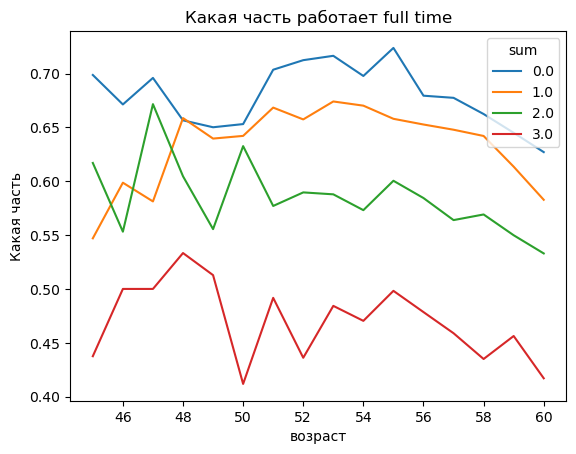

In [9]:
a = df[(df['возраст']>=45)&(df['возраст']<=60)&(df['sum']<=3)].groupby(['возраст', 'sum', 'сколько работает']).size().unstack().fillna(0)
a['summa'] = a.sum(axis=1)
a['my_percent'] = a['полный рабочий день'] / a['summa']
a['my_percent'].unstack().plot()
plt.title('Какая часть работает full time')
plt.ylabel('Какая часть')

In [16]:
df['в браке'] = 'нет'
df.loc[df['состоит в браке']=='да', 'в браке'] = 'да'

Text(0, 0.5, 'Какая часть')

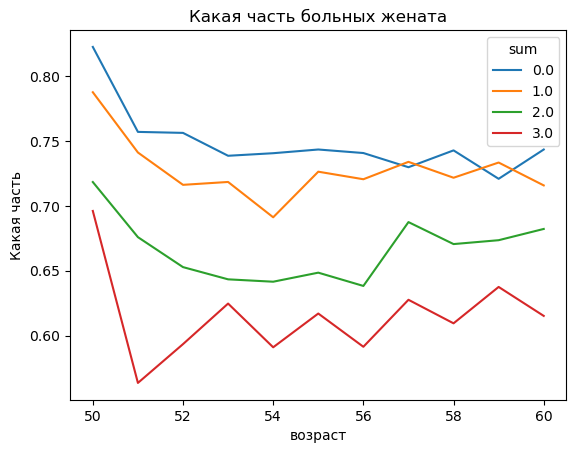

In [26]:
a = df[(df['возраст']>=50)&(df['возраст']<=60)&(df['sum']<=3)].groupby(['возраст', 'sum', 'в браке']).size().unstack().fillna(0)
a['summa'] = a.sum(axis=1)
a['my_percent'] = a['да'] / a['summa']
a['my_percent'].unstack().plot()
plt.title('Какая часть больных жената')
plt.ylabel('Какая часть')

Text(0.5, 0, 'Пол')

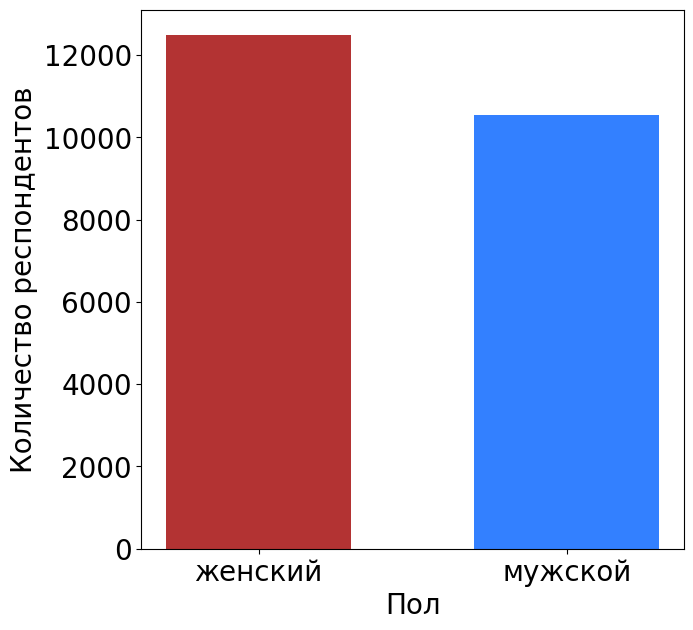

In [5]:
a = df[df['возраст']<=65].groupby('пол')['id'].nunique()
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 20})
plt.bar(a.index, a.tolist(), color=((0.7,0.2,0.2), (0.2, 0.5, 1)), width=0.6)
plt.ylabel('Количество респондентов')
plt.xlabel('Пол')

<Figure size 700x700 with 0 Axes>

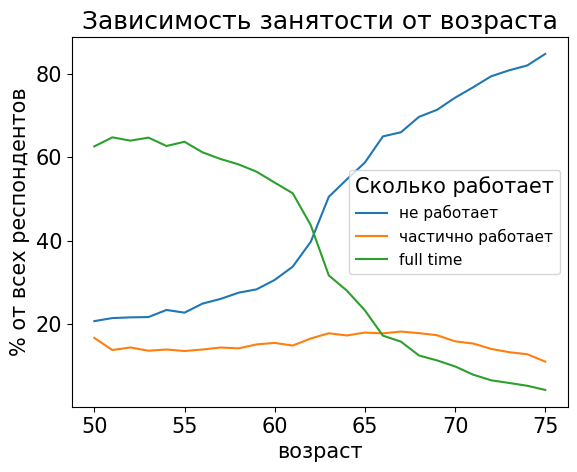

In [6]:
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})

df['сколько работает num'] = df['сколько работает'].replace({
   'на пенсии': 0,
   'полный рабочий день': 2,
   'не работает': 0,
   'частично на пенсии': 1,
   'частичный рабочий день': 1,
   'инвалид': 0,
   'безработный': 0
})


a = df[(df['возраст']>=50)&(df['возраст']<=75)].groupby(['возраст', 'сколько работает num']).size().unstack().fillna(0)
a['sum'] = a.sum(axis=1)
for x in a.columns[:-1]: a[x] /= a['sum']
a.drop('sum', axis=1, inplace=True)
(a * 100).plot()
plt.title('Зависимость занятости от возраста')
plt.ylabel('% от всех респондентов')
plt.legend(['не работает', 'частично работает', 'full time'], title='Сколько работает', fontsize=11)

Text(0.5, 1.0, 'Распределение по возрасту')

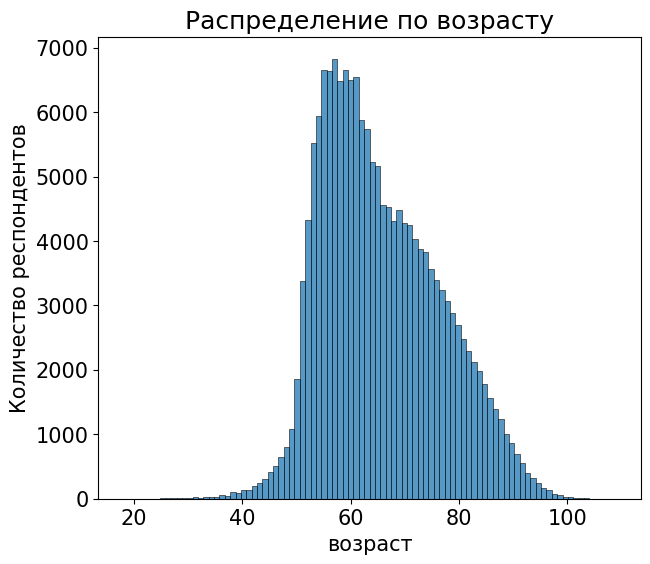

In [7]:
plt.figure(figsize=(7,6))
plt.rcParams.update({'font.size': 15})

sns.histplot(df['возраст'], bins=92)
plt.ylabel('Количество респондентов')
plt.title('Распределение по возрасту')

Text(0, 0.5, 'Количество респондентов')

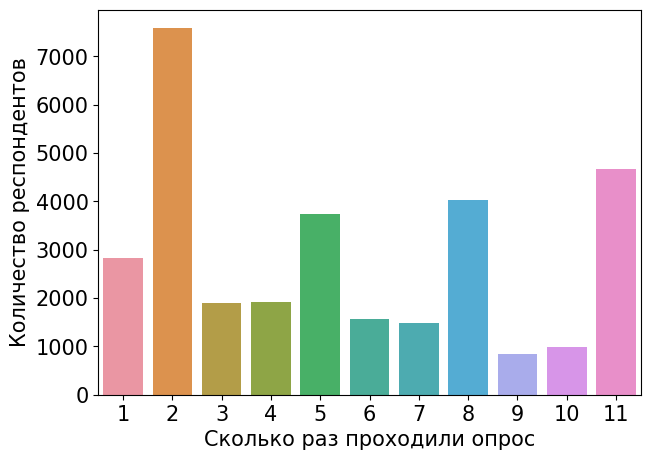

In [8]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 15})

a = df.groupby('id').size().value_counts()
sns.barplot(x=a.index, y=a.values)

plt.xlabel('Сколько раз проходили опрос')
plt.ylabel('Количество респондентов')

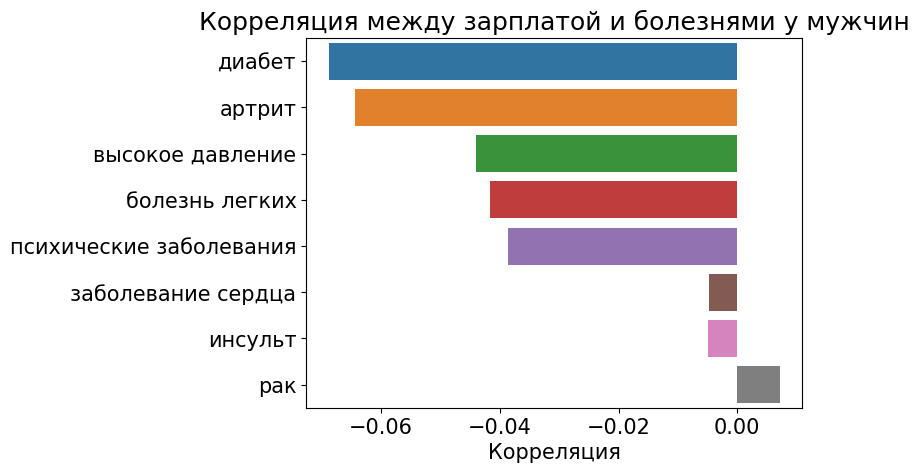

In [9]:
new_df = df[(df['пол']=='мужской')&(df['возраст']>=40)&(df['возраст']<=60)&(df['доход от зп']>0)&(df['сколько работает']=='полный рабочий день')]
a = new_df[['доход от зп']+diseases].corr()['доход от зп']
a = a[a!=1]
sns.barplot(y=a.index, x=a.tolist(), order=['диабет', 'артрит', 'высокое давление',
                                             'болезнь легких', 'психические заболевания', 'заболевание сердца', 'инсульт', 'рак'])
plt.title('Корреляция между зарплатой и болезнями у мужчин')
plt.xlabel('Корреляция', fontsize=15)
plt.show()

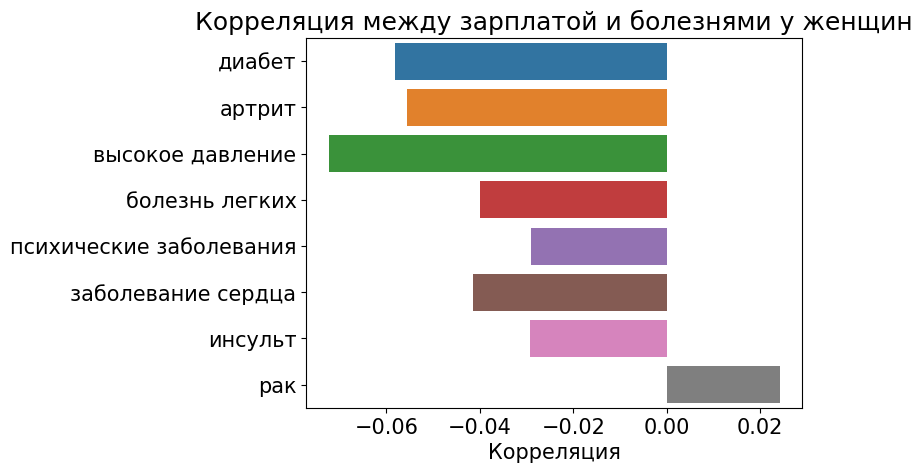

In [10]:
new_df = df[(df['пол']=='женский')&(df['возраст']>=40)&(df['возраст']<=60)&(df['доход от зп']>0)&(df['сколько работает']=='полный рабочий день')]
a = new_df[['доход от зп']+diseases].corr()['доход от зп']
a = a[a!=1]
sns.barplot(y=a.index, x=a.tolist(), order=['диабет', 'артрит', 'высокое давление',
                                             'болезнь легких', 'психические заболевания', 'заболевание сердца', 'инсульт', 'рак'])
plt.title('Корреляция между зарплатой и болезнями у женщин')
plt.xlabel('Корреляция', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Влияние болезней на зарплату')

<Figure size 900x700 with 0 Axes>

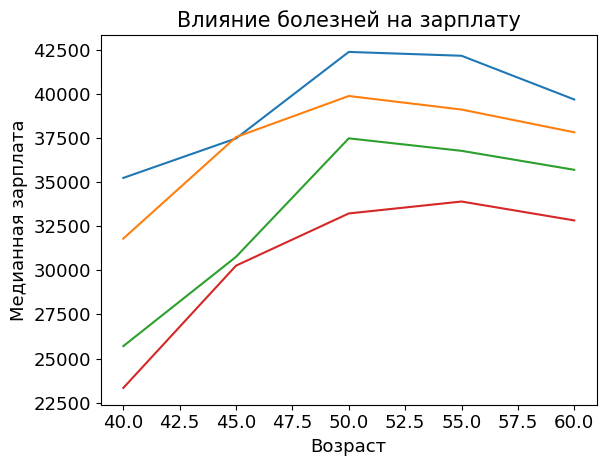

In [11]:
plt.figure(figsize=(9,7))
plt.rcParams.update({'font.size': 13})

new_df = df[(df['доход от зп']>0)&(df['возраст']>=40)&(df['возраст']<=60)&(df['сколько работает']=='полный рабочий день')&(df['sum']<=3)]
new_df['возраст'] -= new_df['возраст'] % 5
new_df.groupby(['возраст', 'sum'])['доход от зп'].median().unstack().plot(legend=None)

plt.xlabel('Возраст')
plt.ylabel('Медианная зарплата')
plt.title('Влияние болезней на зарплату', fontsize=15)

Text(0, 0.5, 'Какая часть работает full time')

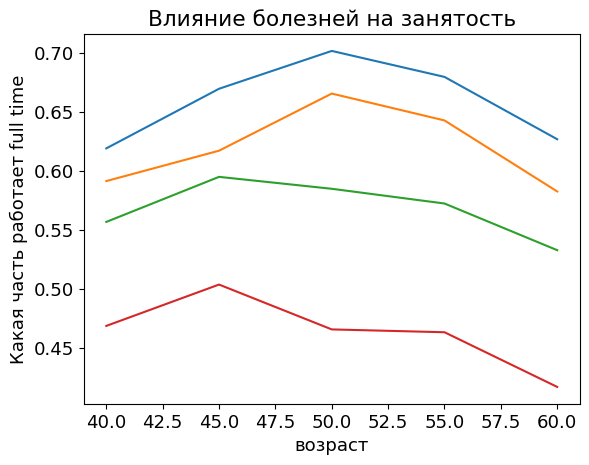

In [12]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=60)&(df['sum']<=3)]
new_df['возраст'] -= new_df['возраст'] % 5
a = new_df.groupby(['возраст', 'sum', 'сколько работает']).size().unstack().fillna(0)
a['summa'] = a.sum(axis=1)
a['my_percent'] = a['полный рабочий день'] / a['summa']
a['my_percent'].unstack().plot(legend=None)
plt.title('Влияние болезней на занятость')
plt.ylabel('Какая часть работает full time')

In [13]:
df['пол'] = df['пол'].replace({'мужской':1, 'женский':2})

new_df = df[(df['доход от зп']!=0)&(df['возраст']>=40)&(df['возраст']<=60)&(df['сколько работает']=='полный рабочий день')][diseases+[
                                  'возраст', 'пол', 'закончил колледж',
                                  'попадал в больницу за последний год', 'кол-во ночей, которое провел в больнице', 'доход от зп']].fillna(0)

new_df['пол'] -= 1
new_df['возраст'] -= new_df['возраст'].min()

new_df = new_df.rename({'sum': 'кол-во болезней'}, axis=1)

new_df['constant'] = 1

import statsmodels.api as sm

model = sm.OLS(new_df['доход от зп'], new_df.drop(['доход от зп'], axis=1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            доход от зп   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     494.2
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:41:27   Log-Likelihood:            -4.0570e+05
No. Observations:               33623   AIC:                         8.114e+05
Df Residuals:                   33609   BIC:                         8.115e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
высокое давление                        -2015.2831    501.297     -4.020      0.000   -2997.843   -1032.723
диабет                                  -6484.8745    788.403     -8.225      0.000   -8030.173   -4939.576
рак                                      3375.6006   1112.007      3.036      0.002    1196.029    5555.172
болезнь легких                          -3411.4462   1331.077     -2.563      0.010   -6020.402    -802.490
заболевание сердца                        780.2539    894.877      0.872      0.383    -973.736    2534.244
инсульт                                  2588.8824   1941.191      1.334      0.182   -1215.920    6393.685
психические заболевания                 -5773.3980    910.134     -6.343      0.000   -7557.293   -3989.503
артрит                                  -2466.9832    514.770     -4.792      0.000   -3475.950   -1458.016
возраст                                  -141.4907     64.412     -2.197      0.028    -267.740     -15.242
пол                                     -2.041e+04    470.620    -43.362      0.000   -2.13e+04   -1.95e+04
закончил колледж                         3.222e+04    518.267     62.166      0.000    3.12e+04    3.32e+04
попадал в больницу за последний год        49.9664    904.741      0.055      0.956   -1723.357    1823.290
кол-во ночей, которое провел в больнице  -236.4034     84.525     -2.797      0.005    -402.075     -70.732
constant                                  5.52e+04   1037.904     53.187      0.000    5.32e+04    5.72e+04
==============================================================================
Omnibus:                    34400.199   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3558216.045
Skew:                           4.923   Prob(JB):                         0.00
Kurtosis:                      52.426   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df['состоит в браке'].value_counts()

да                            108070
вдова                          30016
разошлись                      15665
никогда не состоял в браке      5955
совместное проживание           5748
разошлись, но в оф браке        2865
да, супруг отсутствует          1264
не понятно                      1064
Name: состоит в браке, dtype: int64

In [16]:
df[df['состоит в браке']=='совместное проживание']

,id,состоит в браке,пол,латиноамериканец,раса,date,возраст,возраст супруга/супруги,изменение здоровья,проблемы со здоровьем ограничивают возможность работать,высокое давление,диабет,рак,болезнь легких,заболевание сердца,инсульт,психические заболевания,артрит,попадал в больницу за последний год,"кол-во ночей, которое провел в больнице","медицинские расходы, не покрываемые страховкой",доход от зп,доход от пенсии,доход супруга от зп,доход супруга от пенсии,мед страховка оплачивается работадателем респондента,мед страховка оплачивается работадателем супруга,сколько работает,работа требует физ усилий,работа требует поднятие тяжестей,сколько недель работал на осн работе за последний год,сколько недель работал на 2 работе за последний год,сколько проработал на нынещнем рабочем месте,волна опроса,гос мед страховка,отсутствие мед страховки,на пенсии,закончил колледж,year,индекс потребительских цен,доход от др выплат,доход супруга от др выплат,доход нормализованный,доход супруга нормализованный,общий доход,плохой доход,сколько работает num,sum
262,10299010,совместное проживание,1,0.0,1.0,15feb2000,59.0,48.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2343.268410,102901.860620,0.000000,26633.422749,0.0,1.0,0.0,полный рабочий день,NaN,NaN,52.0,0.0,NaN,5,0,0,0.0,1,1999,0.967805,0.000000,0.000000,102901.860620,26633.422749,129535.283369,0,2,2.0
263,10299010,совместное проживание,1,0.0,1.0,15aug2012,72.0,44.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,4687.410467,0.000000,0.000000,0.000000,0.0,1.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,11,0,0,1.0,1,2011,1.306293,13157.211526,0.000000,13157.211526,0.000000,13157.211526,0,0,3.0
265,10299010,совместное проживание,1,0.0,1.0,15jan2003,62.0,51.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3061.273489,9353.383715,0.000000,0.000000,0.0,1.0,0.0,частично на пенсии,4.0,4.0,40.0,0.0,1.4,6,0,0,0.0,1,2002,1.044544,5009.256766,0.000000,14362.640480,0.000000,14362.640480,0,1,2.0
266,10299010,совместное проживание,1,0.0,1.0,15jul2010,69.0,42.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,1456.362825,0.000000,0.000000,0.000000,0.0,1.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,10,0,0,1.0,1,2009,1.245748,13415.043813,0.000000,13415.043813,0.000000,13415.043813,0,0,3.0
267,10299010,совместное проживание,1,0.0,1.0,15apr2008,67.0,39.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2051.128279,0.000000,9385.801093,0.000000,0.0,1.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,9,0,0,1.0,1,2007,1.204051,13890.985007,0.000000,23276.786100,0.000000,23276.786100,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170704,920672020,совместное проживание,1,0.0,2.0,15feb2011,54.0,51.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,6.0,3501.425603,353.611607,0.000000,106.083482,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,1,1,0,1.0,0,2010,1.266227,50.920071,18368.001414,404.531678,18474.084896,18878.616574,0,0,5.0
170705,920672020,совместное проживание,1,0.0,2.0,15may2012,55.0,52.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,3987.033729,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,2,1,0,1.0,0,2011,1.306293,12638.897448,1993.516844,12638.897448,5980.550573,18619.448021,0,0,5.0
170730,920760010,совместное проживание,2,0.0,2.0,15nov2010,61.0,71.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25573.339705,0.000000,25573.339705,0.0,1.0,0.0,полный рабочий день,3.0,4.0,52.0,0.0,5.0,4,0,0,0.0,0,2009,1.245748,0.000000,7891.202073,25573.339705,33464.541778,59037.881483,0,2,1.0
170733,920760020,совместное проживание,1,0.0,2.0,15oct2010,71.0,61.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1645.689992,25573.339705,0.000000,25573.339705,0.0,1.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,4,1,0,1.0,0,2009,1.245748,7891.202073,0.000000,33464.541778,25573.339705,59037.881483,0,0,2.0


In [24]:
df = df[df['состоит в браке']!='не понятно']

df['живут вместе'] = df['состоит в браке'].replace({
    'да': 1, 'вдова':0,
    'разошлись':0, 'никогда не состоял в браке':0,
    'совместное проживание':1, 'разошлись, но в оф браке':0,
    'да, супруг отсутствует':0})

<AxesSubplot: >

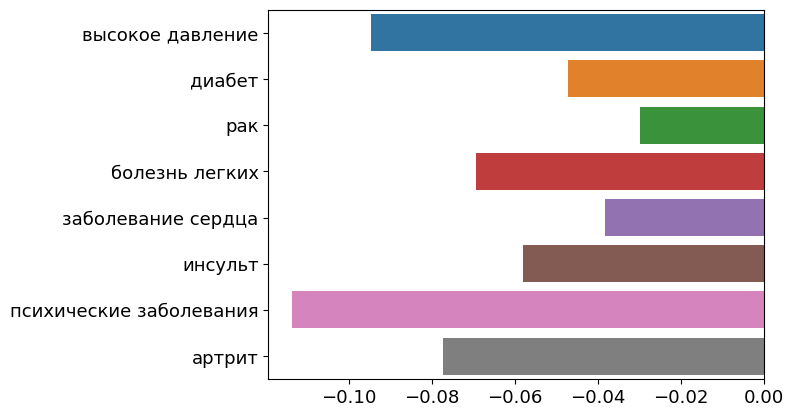

In [27]:
new_df = df[(df['возраст']>=40)&(df['возраст']<=60)]
a = new_df[['живут вместе']+diseases].corr()['живут вместе']
a = a[a!=1]
sns.barplot(y=a.index, x=a.tolist())

In [32]:
df[df['доход супруга нормализованный']>0]['состоит в браке'].value_counts()

да                        93984
совместное проживание      5035
да, супруг отсутствует     1099
Name: состоит в браке, dtype: int64

In [30]:
df

,id,состоит в браке,пол,латиноамериканец,раса,date,возраст,возраст супруга/супруги,изменение здоровья,проблемы со здоровьем ограничивают возможность работать,высокое давление,диабет,рак,болезнь легких,заболевание сердца,инсульт,психические заболевания,артрит,попадал в больницу за последний год,"кол-во ночей, которое провел в больнице","медицинские расходы, не покрываемые страховкой",доход от зп,доход от пенсии,доход супруга от зп,доход супруга от пенсии,мед страховка оплачивается работадателем респондента,мед страховка оплачивается работадателем супруга,сколько работает,работа требует физ усилий,работа требует поднятие тяжестей,сколько недель работал на осн работе за последний год,сколько недель работал на 2 работе за последний год,сколько проработал на нынещнем рабочем месте,волна опроса,гос мед страховка,отсутствие мед страховки,на пенсии,закончил колледж,year,индекс потребительских цен,доход от др выплат,доход супруга от др выплат,доход нормализованный,доход супруга нормализованный,общий доход,плохой доход,сколько работает num,sum,живут вместе
0,2010,вдова,2,0.0,1.0,15jun1998,63.0,NaN,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,87.338170,0.000000,0.000000,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,4,1,0,1.0,0,1997,0.934777,7910.580592,0.0,7910.580592,0.000000,7910.580592,0,0,3.0,0.0
1,2010,вдова,2,0.0,1.0,15oct1996,62.0,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,183.223027,0.000000,0.000000,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,3,1,0,1.0,0,1995,0.891173,8275.299661,0.0,8275.299661,0.000000,8275.299661,0,0,3.0,0.0
2,2010,вдова,2,0.0,1.0,15mar2000,65.0,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,5,1,0,1.0,0,1999,0.967805,7263.660718,0.0,7263.660718,0.000000,7263.660718,0,0,3.0,0.0
3,2010,вдова,2,0.0,1.0,23jul1994,59.0,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,36.907657,0.000000,0.000000,0.000000,0.0,0.0,0.0,полный рабочий день,3.0,4.0,52.0,0.0,0.1,2,1,0,0.0,0,1993,0.852219,4721.269761,0.0,4721.269761,0.000000,4721.269761,0,2,2.0,0.0
4,2010,вдова,2,0.0,1.0,18sep1992,57.0,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,279.492032,0.000000,3764.057497,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,1,1,0,1.0,0,1991,0.811126,5170.408508,0.0,8934.466005,0.000000,8934.466005,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170756,958361010,"разошлись, но в оф браке",1,0.0,2.0,15nov2010,46.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,частичный рабочий день,1.0,1.0,30.0,0.0,0.1,1,0,0,0.0,0,2009,1.245748,17536.003269,0.0,17536.003269,0.000000,17536.003269,0,1,1.0,0.0
170757,958361010,да,1,0.0,2.0,15jun2012,47.0,56.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,41199.348530,0.000000,26580.224858,0.0,1.0,0.0,полный рабочий день,1.0,1.0,52.0,0.0,1.7,2,0,0,0.0,0,2011,1.306293,0.000000,0.0,41199.348530,26580.224858,67779.573388,0,2,1.0,1.0
170758,959733010,никогда не состоял в браке,1,0.0,2.0,15oct2010,49.0,NaN,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,136.534015,0.000000,0.000000,0.000000,0.0,0.0,0.0,на пенсии,NaN,NaN,0.0,0.0,NaN,1,1,0,1.0,0,2009,1.245748,6137.601505,0.0,6137.601505,0.000000,6137.601505,0,0,3.0,0.0
170759,959738010,разошлись,1,0.0,NaN,15nov2012,61.0,NaN,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2604.116926,6645.056215,0.000000,0.000000,0.0,0.0,0.0,безработный,NaN,NaN,0.0,0.0,NaN,5,1,0,0.0,0,2011,1.306293,12519.285682,0.0,19164.341897,0.000000,19164.341897,0,0,2.0,0.0
